In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import healpy as hp
from lsst.sims.utils import haversine

In [2]:
names = ['fieldRA', 'fieldDec', 'rotSkyPos', 'expMJD']
types = [float]*4
npts = 180
data = np.zeros(npts, dtype=zip(names,types))
data['rotSkyPos'] = np.arange(0,npts*2,2)
deltaMJD = 34.*npts/3600./24.
expMJD_0 = 57000.
data['expMJD'] = expMJD_0+np.arange(0,deltaMJD, 34./3600./24.)

In [3]:
outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [4]:
nside = 2048
metric = metrics.CountMetric(col='fieldRA')
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, useCache=False)
bundle = metricBundles.MetricBundle(metric,slicer,'')

Healpix slicer using NSIDE=2048, approximate resolution 1.717743 arcminutes


In [5]:
bg = metricBundles.MetricBundleGroup({1:bundle},None,  outDir=outDir, resultsDb=resultsDb)
bg.setCurrent('')
bg.runCurrent('',simData=data)

Running:  [1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


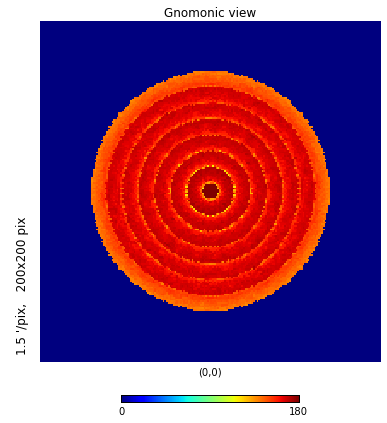

In [6]:
hp.gnomview(bundle.metricValues.data)

In [7]:
print 'fill factor = %f' % (bundle.metricValues.mean()/bundle.metricValues.max())

fill factor = 0.887512


In [8]:
good = np.where(bundle.metricValues.mask != True)
# compute the ra and dec of each pixel, find distance to 0,0
lat, ra = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))[good])
dec = np.pi/2. - lat
radius = haversine(ra,dec,0.,0.)

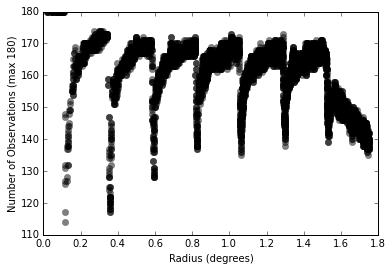

In [9]:
plt.plot(np.degrees(radius), bundle.metricValues.data[good], 'ko', alpha=.5)
plt.xlabel('Radius (degrees)')
plt.ylabel('Number of Observations (max %i)' % npts)

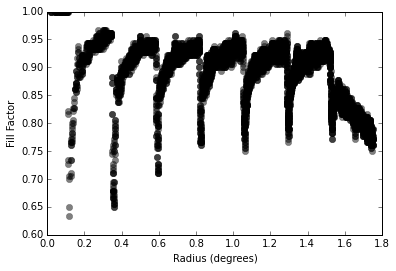

In [10]:
plt.plot(np.degrees(radius), bundle.metricValues.data[good]/npts, 'ko', alpha=.5)
plt.xlabel('Radius (degrees)')
plt.ylabel('Fill Factor')